<a href="https://colab.research.google.com/github/Atharva-D/Moodify/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Downloading Dataset**

In [1]:
%pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

^C
Note: you may need to restart the kernel to use updated packages.


The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


#**Unzipping the dataset**

In [3]:

!unzip face-expression-recognition-dataset

'unzip' is not recognized as an internal or external command,
operable program or batch file.


#**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.applications import MobileNetV2
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#**Training Data**

In [2]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "content\\images\\images\\train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28821 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

#**Testing Data**

In [3]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "content\\images\\images\\validation", 
                                           target_size=(224,224), 
                                           batch_size=32)
val_data.class_indices

Found 7066 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

# **Visualize the images in the training data**

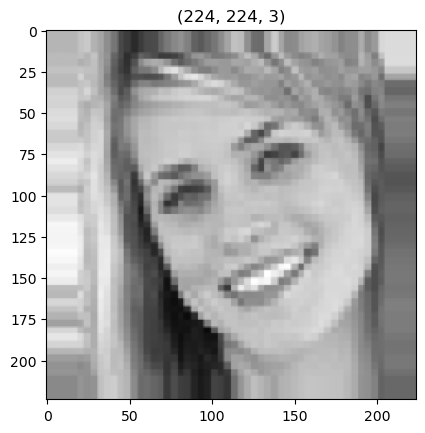

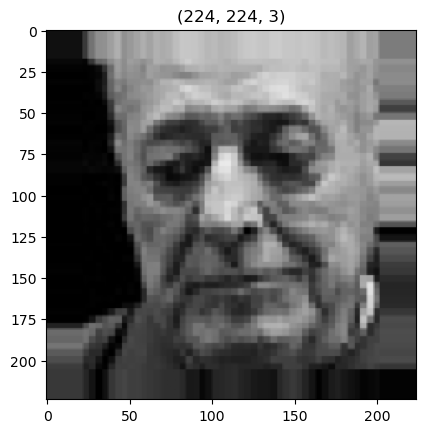

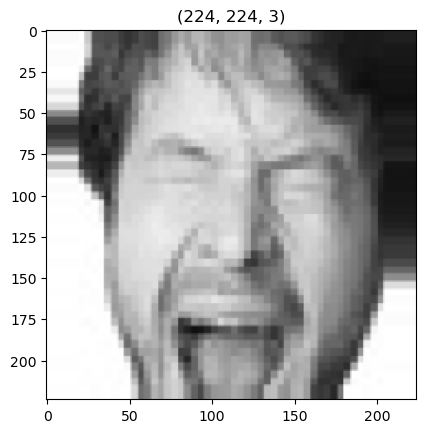

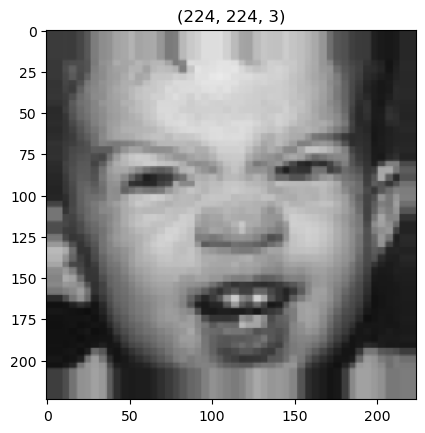

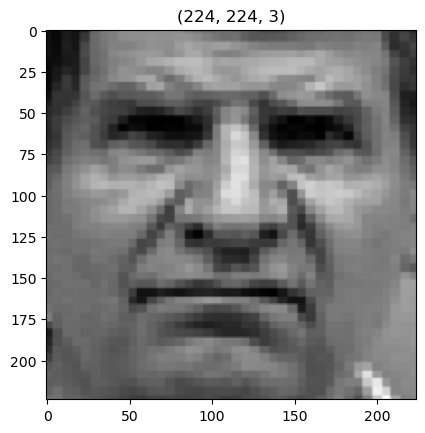

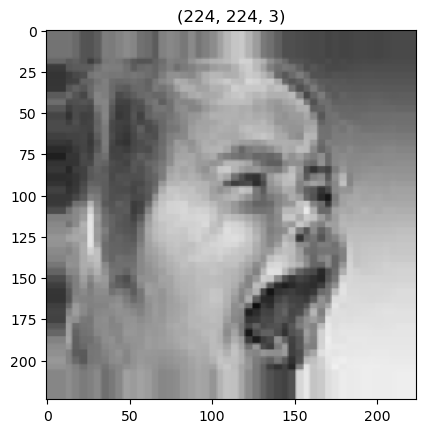

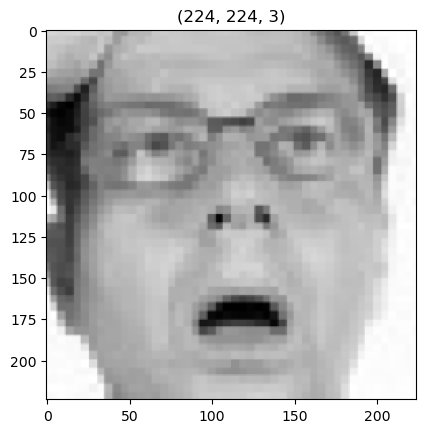

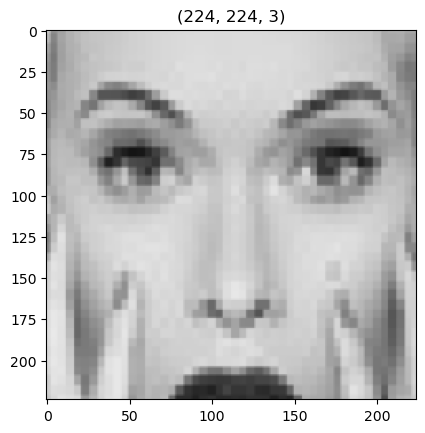

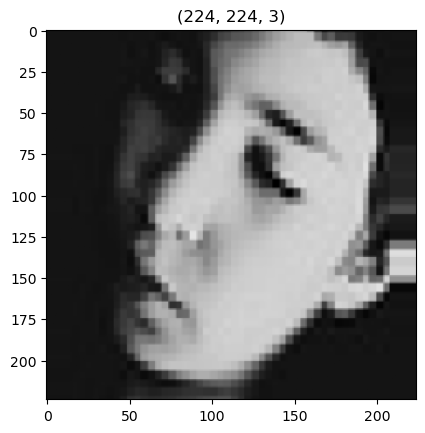

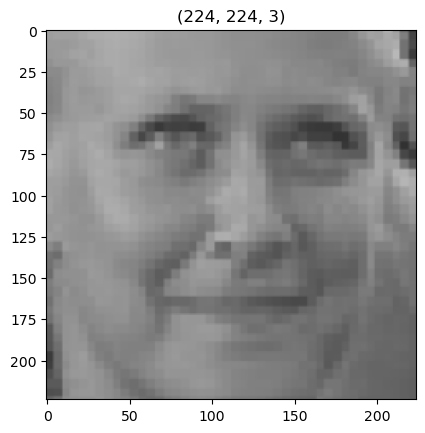

In [4]:
t_img , label = train_data.next()

def plotImages(img_arr, label):
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)


#**Using MobileNet for its pre-trained weights**


In [5]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)



# **Creating our model.**


In [6]:
model = Model(base_model.input, x)
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

#**Training the model**

In [7]:
hist = model.fit_generator(train_data, 
                           #28821/32
                           steps_per_epoch=451, 
                           epochs= 10, 
                           
                           validation_data= val_data, 
                           #7066/32
                           validation_steps= 109,
                           )

C:\Users\jana\AppData\Local\Temp\ipykernel_8376\4040094135.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/10
451/451 [==============================] - 1494s 3s/step - loss: 6.8311 - accuracy: 0.4123 - val_loss: 5.6665 - val_accuracy: 0.4796
Epoch 2/10
451/451 [==============================] - 1182s 3s/step - loss: 7.0892 - accuracy: 0.4867 - val_loss: 8.4109 - val_accuracy: 0.4427
Epoch 3/10
451/451 [==============================] - 1089s 2s/step - loss: 7.4497 - accuracy: 0.5118 - val_loss: 8.4179 - val_accuracy: 0.4880
Epoch 4/10
451/451 [==============================] - 1385s 3s/step - loss: 7.6368 - accuracy: 0.5284 - val_loss: 7.6790 - val_accuracy: 0.5387
Epoch 5/10
451/451 [==============================] - 1052s 2s/step - loss: 7.4113 - accuracy: 0.5438 - val_loss: 8.6448 - val_accuracy: 0.5232
Epoch 6/10
451/451 [==============================] - 865s 2s/step - loss: 7.3686 - accuracy: 0.5573 - val_loss: 9.1067 - val_accuracy: 0.5292
Epoch 7/10
451/451 [==============================] - 1411s 3s/step - loss: 7.5124 - accuracy: 0.5685 - val_loss: 8.9182 - val_accuracy: 

#**Saving the built Model**

In [8]:
# Save the model in h5 format 
model.save('final_model.h5')

#**Train accuracy v/s Testing accuracy**

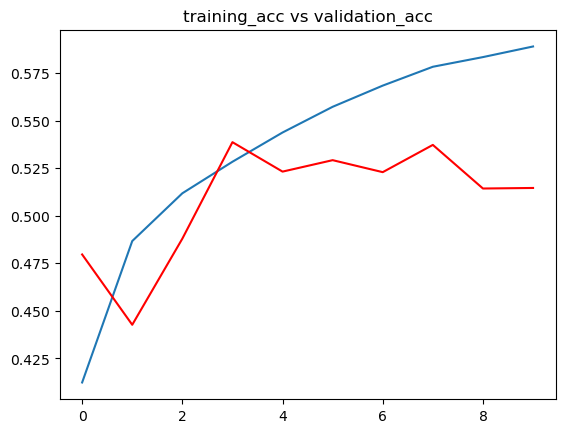

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'] , c = "red")
plt.title("training_acc vs validation_acc")
plt.show()

#**Training Loss v/s Testing Loss**

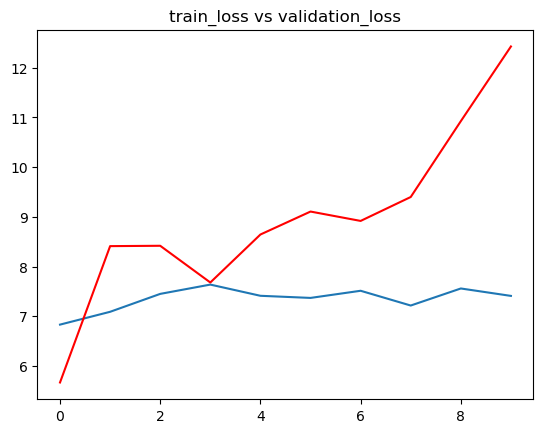

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'] , c = "red")
plt.title("train_loss vs validation_loss")
plt.show()

# **Testing the model using images**

In [11]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 4s 4s/step
 the image is of neutral


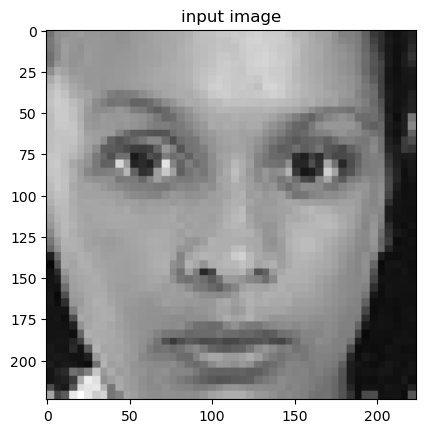

In [12]:
# path for the image to see if it predics correct class

path = "content\\images\\images\\validation\\neutral\\508.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [13]:
results = model.evaluate(val_data)
preds   = model.predict(val_data)
print('The current model achieved a categorical accuracy of {}%!'.format(round(results[1]*100,2)))

221/221 [==============================] - 271s 1s/step
The current model achieved a categorical accuracy of 51.92%!
